In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.pca_var_model import PCAVARModel

# 1. Read data

In [3]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


# 2. AR model per country

In [4]:
model = PCAVARModel(num_pcs=2, lags = [1, 2, 3, 4], standardize_pre_post = True)
model

In [5]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


In [6]:
#model.fit(df_inflation.query("yearmonth <= '2010-01-01'"))
model.fit(df_inflation)

Text(0.5, 1.0, 'Fraction of variance explained by each principal component')

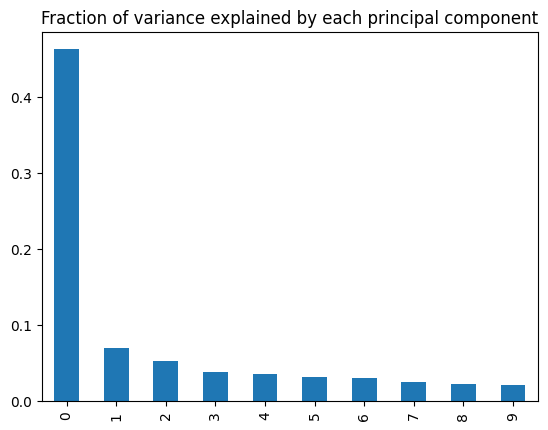

In [7]:
import matplotlib.pyplot as plt

pd.Series(model.all_eigenvalues).pipe(lambda x: x / x.sum()).head(10).plot.bar()
plt.title("Fraction of variance explained by each principal component")

In [8]:
(model.all_eigenvalues[0] + model.all_eigenvalues[1]) / sum(model.all_eigenvalues)

0.5325806690386493

PC1 and PC2 seem to combine 95% of the variance in inflation together.

<Axes: xlabel='Country'>

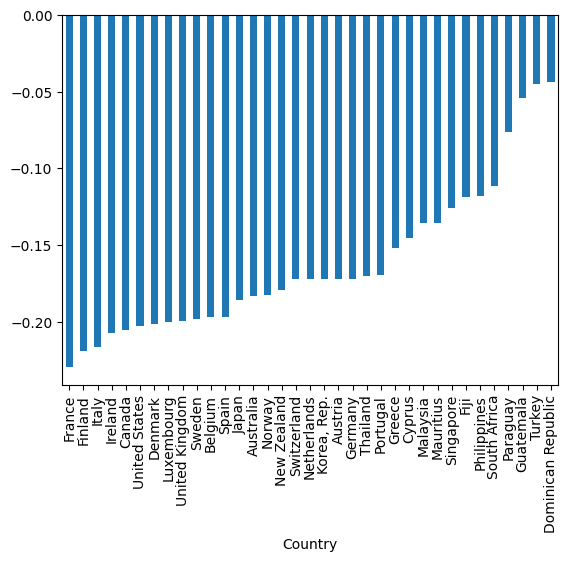

In [9]:
pd.Series(model.all_eigenvectors[:, 0], index = model.data_wide_columns).sort_values().plot.bar()

PC1 dominated by Peru and Argentina

# 3. Evaluation

In [10]:
df_inflation["Country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea, Rep.',
       'Fiji', 'Paraguay', 'Malaysia', 'Sweden', 'Switzerland',
       'Thailand', 'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Turkey', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

In [11]:
preds = model.predict(df_inflation)
preds

,yearmonth,Country,inflation
7105,2023-04-01,Australia,0.016798
7106,2023-04-01,Austria,0.011755
7107,2023-04-01,Belgium,0.013570
7108,2023-04-01,Canada,0.013689
7109,2023-04-01,Cyprus,0.012095
7110,2023-04-01,Denmark,0.015483
7111,2023-04-01,Dominican Republic,0.017380
7112,2023-04-01,Fiji,0.016409
7113,2023-04-01,Finland,0.016960
7114,2023-04-01,France,0.015262


# 4. H-period ahead forecasting

In [12]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


In [13]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2010-01-01", h=1)
forecast

KeyError: 'date'

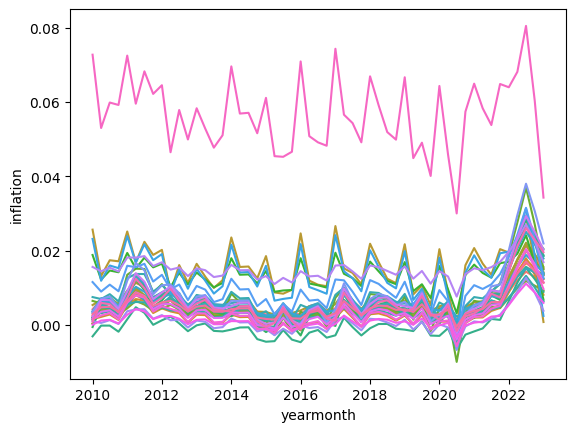

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()

# 5. Compare the forecast with the actual data

In [ ]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,yearmonth,Country,pred,actual
1755,2022-07-01,Denmark,0.019966,0.023957
1756,2022-07-01,Dominican Republic,0.029040,0.013293
1757,2022-07-01,Fiji,0.021484,0.007368
1758,2022-07-01,Finland,0.022115,0.016000
1759,2022-07-01,France,0.019998,0.011638
...,...,...,...,...
1850,2023-01-01,Switzerland,0.005937,0.010084
1851,2023-01-01,Thailand,0.009672,0.000463
1852,2023-01-01,Turkey,0.034252,0.116249
1853,2023-01-01,United Kingdom,0.019557,0.008814


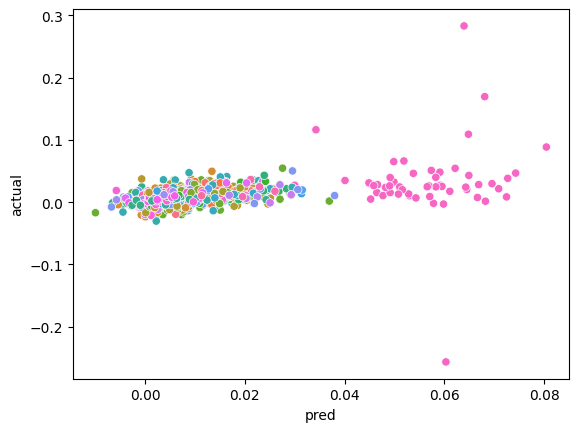

In [ ]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [ ]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     426.4
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.95e-85
Time:                        15:25:21   Log-Likelihood:                 5447.3
No. Observations:                1855   AIC:                        -1.089e+04
Df Residuals:                    1853   BIC:                        -1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.000      5.765      0.000       0.001       0.003
pred           0.5943      0.029     20.650      0.000       0.538       0.651
==============================================================================
Omnibus:                     1419.280   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3852310.296
Skew:                          -2.004   Prob(JB):                         0.00
Kurtosis:                     226.215   Cond. No.                         96.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.var.models["PC1"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PC1   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     113.7
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           3.34e-69
Time:                        15:25:21   Log-Likelihood:                -399.01
No. Observations:                 204   AIC:                             816.0
Df Residuals:                     195   BIC:                             845.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.123      0.071      0.944      -0.233       0.251
PC1_lag_1      0.5255      0.069      7.567      0.000       0.389       0.662
PC2_lag_1     -0.4516      0.111     -4.058      0.000      -0.671      -0.232
PC1_lag_2      0.1360      0.078      1.742      0.083      -0.018       0.290
PC2_lag_2     -0.0294      0.129     -0.228      0.820      -0.284       0.225
PC1_lag_3      0.0364      0.079      0.462      0.644      -0.119       0.191
PC2_lag_3      0.2919      0.128      2.275      0.024       0.039       0.545
PC1_lag_4      0.2523      0.067      3.743      0.000       0.119       0.385
PC2_lag_4      0.1745      0.116      1.503      0.134      -0.054       0.404
==============================================================================
Omnibus:                       17.732   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.019
Skew:                          -0.265   Prob(JB):                     2.27e-11
Kurtosis:                       5.342   Cond. No.                         9.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""